In [3]:
import pandas as pd
import numpy as np
import seaborn
import thinkstats2
import thinkplot

In [4]:
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [5]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [6]:
age = pd.Series(df["Age"])
age.describe()

count    15992.000000
mean        33.225238
std         11.045216
min         16.000000
25%         24.000000
50%         31.000000
75%         42.000000
max         55.000000
Name: Age, dtype: float64

In [7]:
#Make and plot a Hist and Pmf for age.
hist = thinkstats2.Hist(age)
pmf = thinkstats2.Pmf(age)

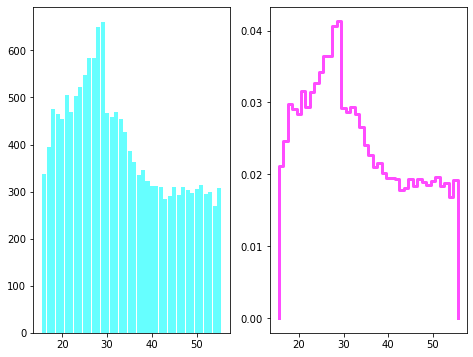

In [8]:
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(hist, color="cyan")
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf, color="magenta")
thinkplot.Config()

In [9]:
#What fraction of the people in the data are 51? 
fiftyone= pmf.Prob(51)
fiftyone

0.01963481740870435

In [10]:
#What fraction are older than 51?
df_over51 = df[df["Age"] > 51]
len(df_over51)/len(age)

0.07322411205602801

In [11]:
#What is the median age?
age.median() 

31.0

In [15]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [20]:
df.iloc[:,[1, 2, 3, 4, 5]]
df["Race"].value_counts

<bound method IndexOpsMixin.value_counts of 0        NotBlack
1        NotBlack
2        NotBlack
3        NotBlack
4        NotBlack
           ...   
15987       black
15988       black
15989    NotBlack
15990    NotBlack
15991    NotBlack
Name: Race, Length: 15992, dtype: object>

In [22]:
#plot 3 earnings

hist_74 = thinkstats2.Hist(df["Earnings_1974"])
hist_75 = thinkstats2.Hist(df["Earnings_1975"])
hist_78 = thinkstats2.Hist(df["Earnings_1978"])

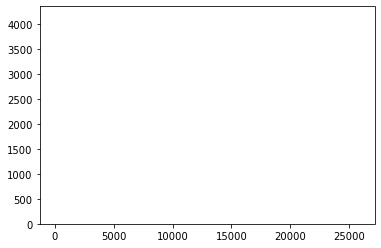

In [25]:

thinkplot.PrePlot(3)
thinkplot.Hist(hist_74, align="right", color="blue")
thinkplot.Hist(hist_75, align="left", color="green")
thinkplot.Hist(hist_78, align="left", color="pink")
thinkplot.Config()